<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Basic-Implementation" data-toc-modified-id="Basic-Implementation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Basic Implementation</a></span></li><li><span><a href="#Training-model" data-toc-modified-id="Training-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Training model</a></span><ul class="toc-item"><li><span><a href="#Sample-generation" data-toc-modified-id="Sample-generation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Sample generation</a></span></li><li><span><a href="#Actual-training" data-toc-modified-id="Actual-training-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Actual training</a></span></li></ul></li><li><span><a href="#Drawing-and-testing" data-toc-modified-id="Drawing-and-testing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Drawing and testing</a></span><ul class="toc-item"><li><span><a href="#Preprocess" data-toc-modified-id="Preprocess-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Preprocess</a></span></li><li><span><a href="#Query" data-toc-modified-id="Query-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Query</a></span></li></ul></li></ul></div>

# Imports

In [204]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import spacy
import random

In [9]:
nlp = spacy.load('en_core_web_sm')

# Basic Implementation

In [109]:
string = nlp('draw a circle of radius 5.2')

In [110]:
from spacy import displacy
displacy.render(string, style="ent")

In [111]:
for a in string.ents:
    print(a, a.label_)

5.2 CARDINAL


# Training model

## Sample generation
```
train_data = [
    ("Uber blew through $1 million a week", [(0, 4, 'ORG')]),
    ("Android Pay expands to Canada", [(0, 11, 'PRODUCT'), (23, 30, 'GPE')]),
    ("Spotify steps up Asia expansion", [(0, 8, "ORG"), (17, 21, "LOC")]),
    ("Google Maps launches location sharing", [(0, 11, "PRODUCT")]),
    ("Google rebrands its business apps", [(0, 6, "ORG")]),
    ("look what i found on google! 😂", [(21, 27, "PRODUCT")])]
```

In [138]:
dict_sentences = [
    'Draw a circle of radius 30', 'Draw a circle',
    'Draw 10 circles of radius 30', 'Draw a circle of radius 5.2',
    'Draw a rectangle of width 5 and length 10', 'Draw a triangle of side 10',
    'Draw a traingle of sides 10, 20, 30',
    'Draw a quadrilateral of sides 10, 20, 30 ,40',
    'Draw circle of radius 100', 'Draw 2 circles of radius 10',
    'Draw 30 triangles of side 5'
]

In [139]:
lis = []

In [140]:
import re
pat = re.compile(r"\d+\.?\d*")
for a in dict_sentences:
    print(a)

    p = input('Enter word ')

    temp, temp_end = a.find(p), temp + len(p)
    tu = [(temp, temp_end, 'FIG')]
    for m in pat.finditer(a):
        tu.append(tuple([m.span()[0], m.span()[1], 'NUM']))
    lis.append((a, {'entities': tu}))
print(lis)

Draw a circle of radius 30
Enter word circle
Draw a circle
Enter word circle
Draw 10 circles of radius 30
Enter word circles
Draw a circle of radius 5.2
Enter word circle
Draw a rectangle of width 5 and length 10
Enter word rectangle
Draw a triangle of side 10
Enter word triangle
Draw a traingle of sides 10, 20, 30
Enter word traingle
Draw a quadrilateral of sides 10, 20, 30 ,40
Enter word quadrilateral
Draw circle of radius 100
Enter word circle
Draw 2 circles of radius 10
Enter word circles
Draw 30 triangles of side 5
Enter word triangles
[('Draw a circle of radius 30', {'entities': [(7, 14, 'FIG'), (24, 26, 'NUM')]}), ('Draw a circle', {'entities': [(7, 13, 'FIG')]}), ('Draw 10 circles of radius 30', {'entities': [(8, 14, 'FIG'), (5, 7, 'NUM'), (26, 28, 'NUM')]}), ('Draw a circle of radius 5.2', {'entities': [(7, 14, 'FIG'), (24, 27, 'NUM')]}), ('Draw a rectangle of width 5 and length 10', {'entities': [(7, 16, 'FIG'), (26, 27, 'NUM'), (39, 41, 'NUM')]}), ('Draw a triangle of side 1

## Actual training

In [141]:
def train_spacy(data, iterations):
    lis = data
    nlp = spacy.blank('en')
    if 'ner' not in nlp.pipe_names:
        ner = nlp.create_pipe('ner')
        nlp.add_pipe(ner, last=True)

    for _, annotations in lis:
        for ent in annotations.get('entities'):
            ner.add_label(ent[2])

    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
    with nlp.disable_pipes(*other_pipes):
        optimizer = nlp.begin_training()
        for itn in range(iterations):
            print("Starting iteration " + str(itn))
            random.shuffle(lis)
            losses = {}
            for text, annotations in lis:
                nlp.update([text], [annotations],
                           drop=0.2,
                           sgd=optimizer,
                           losses=losses)
            print(losses)
    return nlp


prdnlp = train_spacy(lis, 100)
# modelfile = input("Enter your Model Name: ")
prdnlp.to_disk('model/modelfinal')

Starting iteration 0
{'ner': 45.6113984240219}
Starting iteration 1
{'ner': 26.32943755176244}
Starting iteration 2
{'ner': 10.440998929348202}
Starting iteration 3
{'ner': 1.0530521126896728}
Starting iteration 4
{'ner': 0.0022544853464662408}
Starting iteration 5
{'ner': 9.738363844986059e-06}
Starting iteration 6
{'ner': 9.41810254884281e-07}
Starting iteration 7
{'ner': 3.7343472635745327e-07}
Starting iteration 8
{'ner': 1.2178455728350623e-05}
Starting iteration 9
{'ner': 1.759778372297217e-06}
Starting iteration 10
{'ner': 4.3961379827552146e-07}
Starting iteration 11
{'ner': 6.656032880222721e-08}
Starting iteration 12
{'ner': 3.5905338105027613e-06}
Starting iteration 13
{'ner': 4.6894586140868704e-08}
Starting iteration 14
{'ner': 3.4217392559236624e-07}
Starting iteration 15
{'ner': 4.5270659144015363e-08}
Starting iteration 16
{'ner': 1.0707918385703011e-07}
Starting iteration 17
{'ner': 7.202125527512234e-07}
Starting iteration 18
{'ner': 2.74530554418655e-08}
Starting ite

# Drawing and testing

In [142]:
nlp = spacy.load('model/modelfinal/')

## Preprocess

In [201]:
def preprocess(query):
    no_of_figures = 0
    figure = ''
    dimensions = []
    query = query.lower().replace(',', ' ')
    query = re.sub(r'[^a-zA-Z0-9 ]', "", query)
    for a in nlp(query).ents:
        if a.label_ == 'NUM' and figure == '':
            no_of_figures = int(a.text)
        elif a.label_ == 'NUM':
            dimensions.append(int(a.text))
        elif a.label_ == 'FIG':
            figure = a.text
    
    return [no_of_figures,figure,dimensions]

## Query

In [323]:
def main(query):
    no_of_figures,fig_name,dim = preprocess(query)

    img = np.ones((500,500,3), np.uint8)
    img = cv2.rectangle(img,(0,0),(500,500),(255,255,255),-1)

    if fig_name=='circle':
        cv2.circle(img,(250,250),dim[0] , (0,0,255), -1)
    
    elif fig_name=='rectangle':
        print(dim[0],dim[1])
        cv2.rectangle(img,(250,250),(250-dim[0],250-dim[1]),(0,0,255), -1)

    plt.imshow(img)
    plt.grid()
    plt.show()


In [326]:
query = 'Draw a rectangle of sides 300,100'
query2 = 'Draw a circle of radius 100'

300 100


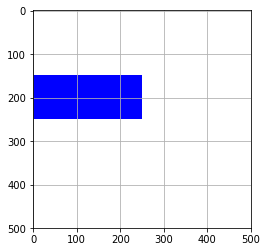

In [327]:
main(query)

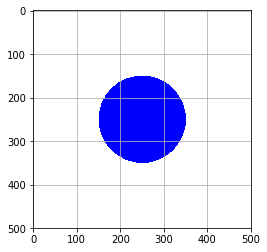

In [328]:
main(query2)